<a href="https://colab.research.google.com/github/owaisishtiaqsiddiqui/QxQ-23-24-Course-Solutions/blob/main/QXQ_YLC_Week_4_Homework_Notebook_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 4: Python Review Double Slit Experiment Simulator**
---

### **Description**
In this homework assignment, you will review variables, functions, and objects. Then, you will use these skills to explore a simulator of the double slit experiment.

<br>

### **Homework Structure**
**Part 1**: [Python Review](#p1)

**Part 2**: [Using the Double Slit Experiment Simulator](#p2)

**Part 3**: [Modifying the Double Slit Experiment Simulator](#p3)

<br>

### **Learning Objectives**
By the end of this assignment, you will:
* Recognize how different components of the double slit experiment affect the interference pattern.
* Understand how to modify attributes of the `doubleSlit` object to recreate interference patterns.


<br>

### **Resources**
* [Double Slit Simulator Documentation](https://drive.google.com/file/d/1iP6t6RAFF-14IAzj8rwuLU_OzqjA7vMs/view?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()
print("Libraries imported successfully!")

Libraries imported successfully!


<a name="p1"></a>

---
## **Part 1: Python Review**
---
In this part, you will practice python skills involving variables, functions, and debugging.

#### **Problem #1.1**
Write code that prints "I love quantum mechanics!".

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
"I love quantum mechanics!"

'I love quantum mechanics!'

#### **Problem #1.2**
Assign string values to the variables below. Then, print a sentence using all your variables.

In [ ]:
animal = # COMPLETE THIS CODE
food = # COMPLETE THIS CODE
color = # COMPLETE THIS CODE

###### **Solution**

In [ ]:
animal = "lion"
food = "apple"
color = "yellow"
"I saw a"

'I saw a'

In [ ]:
color

'yellow'

In [ ]:
animal

'lion'

In [ ]:
"eat an "

'eat an '

In [ ]:
food

'apple'

In [ ]:
animal = "lion"
food = "apple"
color = "yellow"
print("I saw a", color, animal, "eat an", food,".")

I saw a yellow lion eat an apple .


#### **Problem #1.3**
Give a numerical value to the variable below. Write code that solves for the volume of a cube with an edge length of your variable. Print the volume.

In [ ]:
edge = # COMPLETE THIS CODE
volume = # COMPLETE THIS CODE
volume

###### **Solution**

In [ ]:
edge = 10
volume = edge**3
volume

1000


#### **Problem #1.4**
Create variables for floats called `cost_per_apple`, `cost_per_orange`, and `cost_per_banana`, assigning them the values given below:

* Apples cost $5 each.

* Oranges cost $6 each.

* Bananas cost $4.50 each.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
cost_per_apple = 5
cost_per_orange = 6
cost_per_banana = 4.5

#### **Problem #1.5**
Now, calculate the total cost of purchasing 3 apples, 2 oranges, and 5 bananas and store the result in a variable called `total_cost`. Output this variable's value at the end.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
total_cost = 3 * cost_per_apple + 2 * cost_per_orange + 5 * cost_per_banana
total_cost

49.5

#### **Problem #1.6**

Complete the code below to remove the decimal point from the string variable `str_cost` by replacing it with an empty string, '', using the `.replace(...)` method.

<br>

**HINT**: You can find the python string documentation here: [https://docs.python.org/3/library/stdtypes.html#str](https://docs.python.org/3/library/stdtypes.html#str).

In [ ]:
str_cost = str(total_cost)
str_cost.replace('.', # COMPLETE THIS CODE

##### **Solution**

In [ ]:
str_cost = str(total_cost)
str_cost.replace('.', '')

'495'

#### **Problem #1.7**

Complete the code below to modify the string `name` so that it is all uppercase letters using the `.upper()` method.

<br>

**HINT**: You can find the python string documentation here: [https://docs.python.org/3/library/stdtypes.html#str](https://docs.python.org/3/library/stdtypes.html#str).

In [ ]:
name = "Adam"

name.# COMPLETE THIS CODE

##### **Solution**

In [ ]:
name = "Adam"

name.upper()

'ADAM'

#### **Problem #1.8**

Notice that if you output the variable `name` again, it has *not* changed. We can understand why from the documentation for `.upper()`: "Return a copy of the string with all the cased characters converted to uppercase." In other words, the method *returns* or *gives back* a new copy of the string with upper case letters, it *does not* modify the original string!

Complete the code below to store the uppercase version of the string in the variable `name`. Be sure to output the variable in the end, to ensure it is now all uppercase.

<br>

**HINT**: You can find the python string documentation here: [https://docs.python.org/3/library/stdtypes.html#str](https://docs.python.org/3/library/stdtypes.html#str).

In [ ]:
# Output to see that the variable hasn't changed.

name

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
name = name.upper()
name

'ADAM'

#### **Problem #1.9**

Now, complete the code below so that the variable stores the value `ORIGAMI` instead of `orange` using *only* `.replace(..., ...)` and `.upper()`. There are many ways to accomplish this, most of which will require you to use `.replace(...,...)` several times.

<br>

**HINT**: You can find the python string documentation here: [https://docs.python.org/3/library/stdtypes.html#str](https://docs.python.org/3/library/stdtypes.html#str).

In [ ]:
word = 'orange'

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
word = 'orange'

word = word.replace('an', 'i')
word = word.replace('e', 'ami')

word = word.upper()
word

'ORIGAMI'

#### **Problem #1.10**
Debug the code shown below.

In [ ]:
max("1", "2", "17", "3"

SyntaxError: ignored

###### **Solution**

In [ ]:
max(1, 2, 17, 3)

17


#### **Problem #1.11 [ADVANCED]**
Create three variables with different numerical values. Then use the `min` function to find which of your variables has the lowest value.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
a = 1
b = 2
c = 3

min(a, b, c)

1

#### **Problem #1.12 [ADVANCED]**
Use the `input` function to input which week of the course you are in. Then use the `print` function to print `"I am in week [week] of the course!"`.

In [ ]:
week = # COMPLETE THIS CODE

###### **Solution**

In [ ]:
week = input("Enter Week Number Here")
print("I am in week " + week + " of the course!")

Enter Week Number Here4
I am in week 4 of the course!


#### **Problem #1.13 [ADVANCED]**
Use the `min` function to find which of these variables comes first alphabetically.

In [ ]:
animal = "lion"
food = "apple"
color = "yellow"

# COMPLETE THIS CODE

###### **Solution**

In [ ]:
min(animal, food, color)

'apple'

#### **Problem #1.14 [ADVANCED]**
Use the `max` function to find which of these variables comes last alphabetically.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
max(animal, food, color)

'yellow'

<a name="p2"></a>

---
## **Part 2: Using the Double Slit Experiment Simulator**
---
In this part, you will learn how to use the double slit experiment simulator.

#### **Problem #2.1**
Create a `doubleSlit` object using its associated function. Then, use the appropriate method of the `doubleSlit` object to display the screen.


In [ ]:
# COMPLETE THIS CODE

###### **Solution**

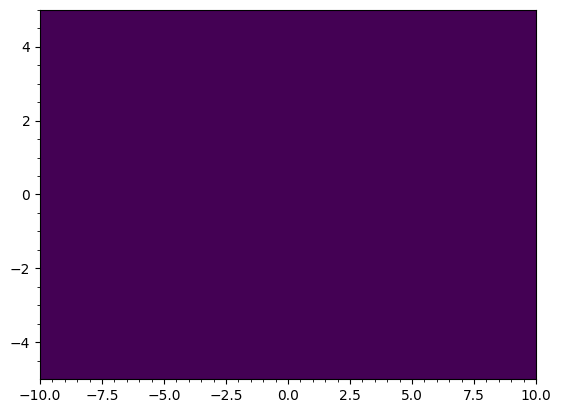

In [ ]:
my_experiment = doubleSlit()
my_experiment.show_screen()

#### **Problem #2.2**
Use the appropriate method of the `doubleSlit` object to fire two individual electrons at the screen. Then, display the screen again.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

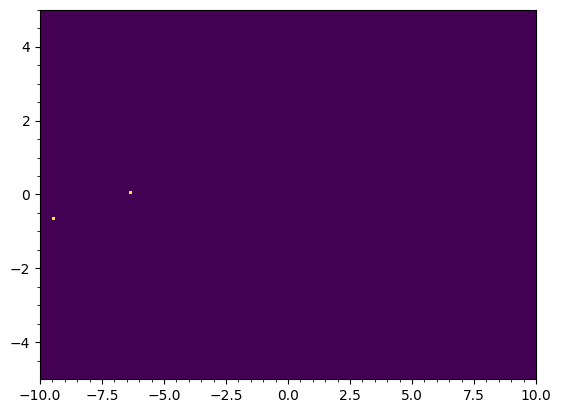

In [ ]:
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.show_screen()

#### **Problem #2.3**
Now, use the appropriate method to fire 12,000 electrons at the screen. Then display the screen.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

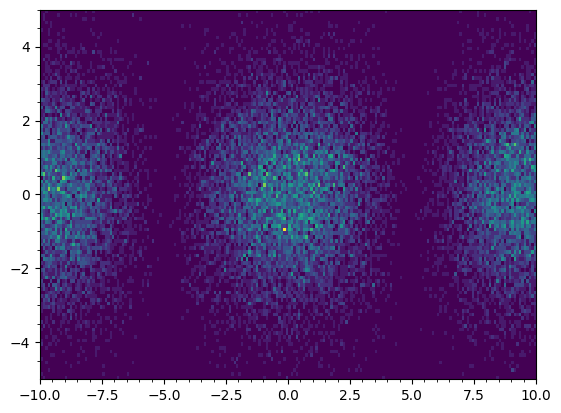

In [ ]:
my_experiment.electron_beam(num_electrons=12000)
my_experiment.show_screen()

#### **Problem #2.4**
Create a  `doubleSlit` object in which you measure which slit the electron passes through. Then fire 12,000 electrons and display the screen.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

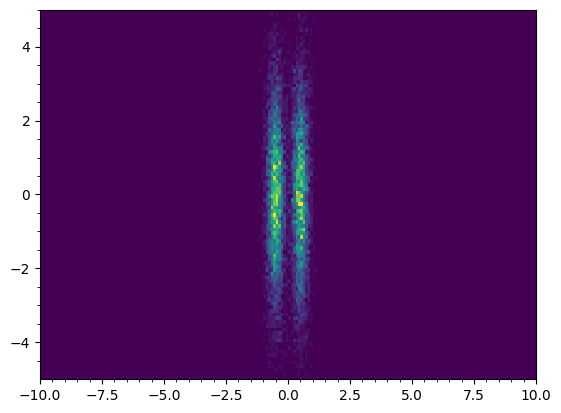

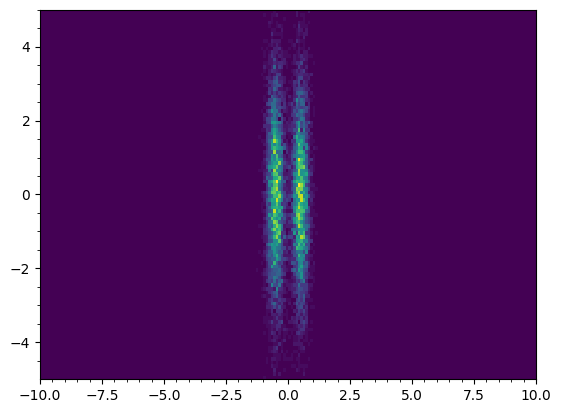

In [ ]:
my_experiment = doubleSlit(measure_slit=True)
my_experiment.electron_beam(num_electrons=12000)
my_experiment.show_screen()

#OR



In [ ]:
# OR

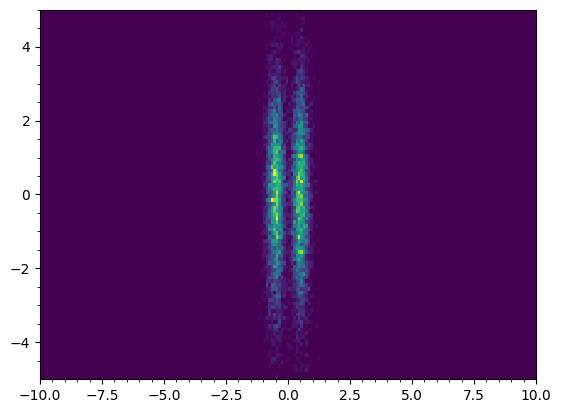

In [ ]:
my_experiment = doubleSlit()
my_experiment.measure_slit=True
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=12000)
my_experiment.show_screen()

<a name="p3"></a>

---
## **Part 3: Modifying the Double Slit Experiment Simulator**
---
In this part, you will see how certain modifications to the `doubleSlit` object affect the interference pattern shown on the screen.

#### **Problem #3.1**
Create a `doubleSlit` object with a `slit_dist` of 10 and a `distance_to_screen` of 15. Fire 10,000 electrons. Then show the screen.

**NOTE** make sure to clear the screen!

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

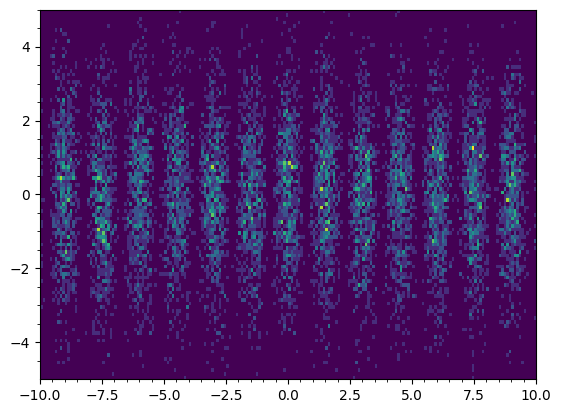

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 10
my_experiment.distance_to_screen = 15
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #3.2**
Create three `doubleSlit` objects, one with a `slit_dist` of 5, one with a `slit_dist` of 25, and one with a `slit_dist` of 50. For each of them, fire 10,000 electrons, and show their screen. What do you notice as slit distance increases?

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

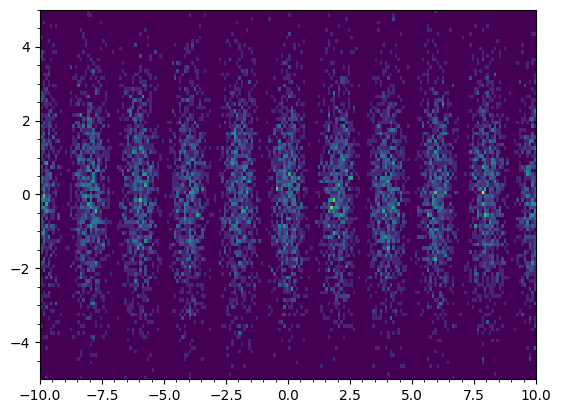

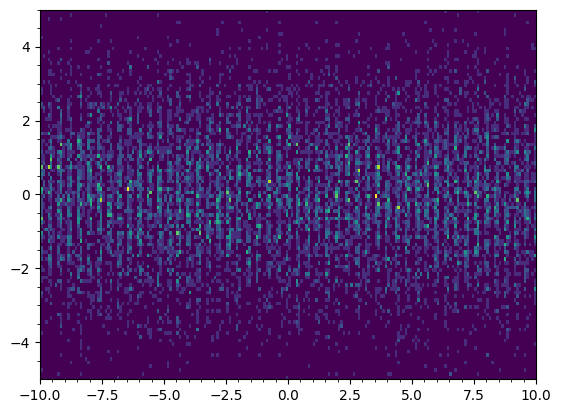

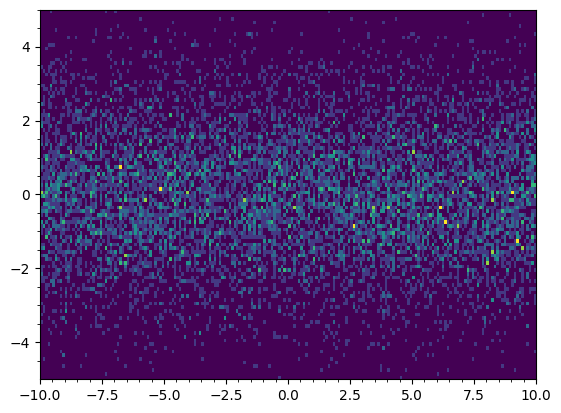

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

my_experiment = doubleSlit()
my_experiment.slit_dist = 25
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

my_experiment = doubleSlit()
my_experiment.slit_dist = 50
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #3.3**
Create three `doubleSlit` objects, one with a `slit_dist` of 5, one with a `slit_dist' of 10, and one with a `slit_dist` of 20. For each of them, measure which slit the electrons pass through, fire 10,000 electrons, and show their screen.

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

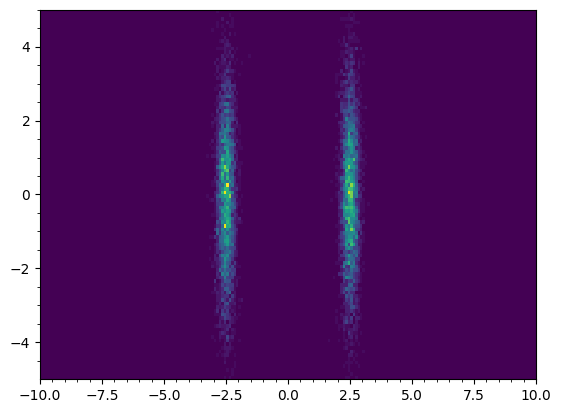

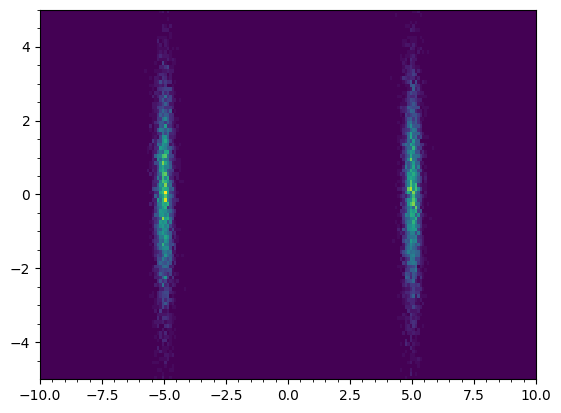

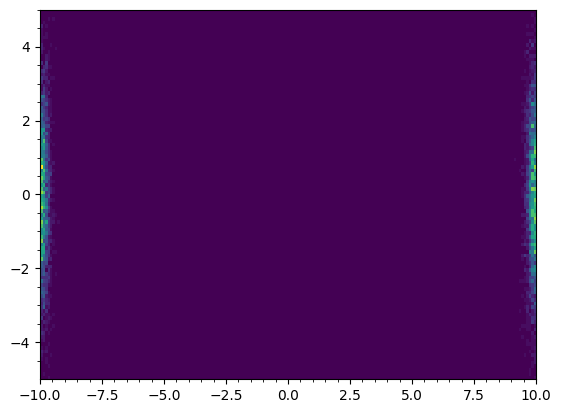

In [ ]:
my_experiment = doubleSlit()
my_experiment.measure_slit = True
my_experiment.slit_dist = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

my_experiment = doubleSlit()
my_experiment.measure_slit = True
my_experiment.slit_dist = 10
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

my_experiment = doubleSlit()
my_experiment.measure_slit = True
my_experiment.slit_dist = 20
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #3.4**
The plot shown below was generated with a `distance_to_screen` of 20. What `slit_dist` was used? Print your answer.

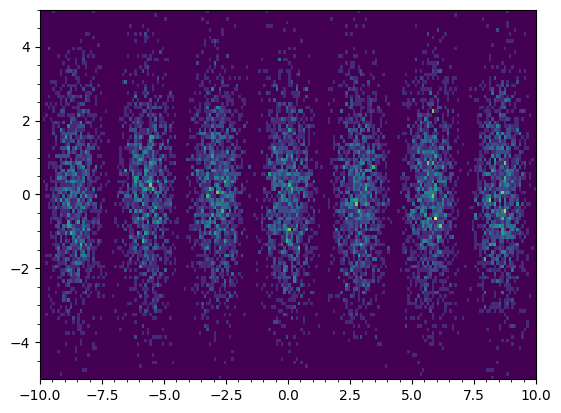

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

###### **Solution**

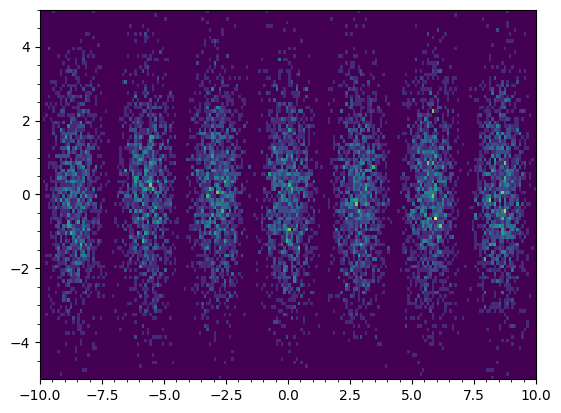

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 7
my_experiment.distance_to_screen = 20
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

In [ ]:
print(7)

7


#### **Problem #3.5**
The plot shown below was generated with a `slit_dist` of 4. What `distance_to_screen` was used? Print your answer.

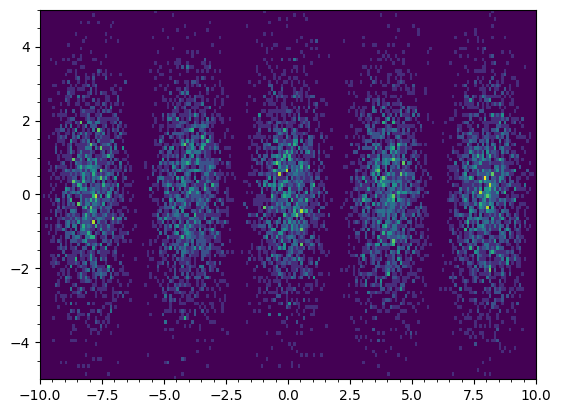

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 4
my_experiment.distance_to_screen = # COMPLETE THIS CODE
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

###### **Solution**

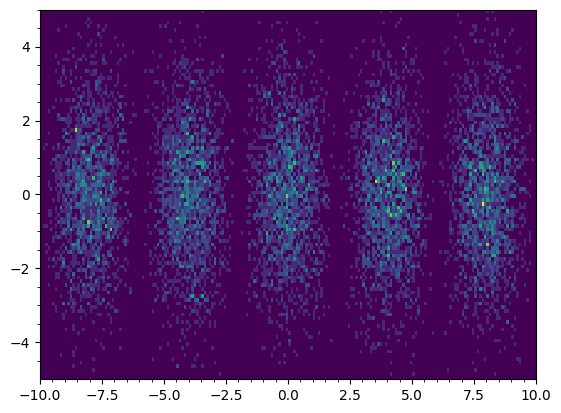

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist = 4
my_experiment.distance_to_screen = 16
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

In [ ]:
print(16)

16


#End of notebook
---
© 2023 The Coding School, All rights reserved